In [1]:
import os
import sys
import time
import networkx as nx

import matplotlib.pyplot as plt
from typing import List, Optional
from pyvis.network import Network

from pydantic import BaseModel, ValidationError

In [2]:
# Get the current working directory
current_dir = os.getcwd()

# Assuming the project root is one level up from the current directory
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Add the project root to the Python path
sys.path.append(project_root)

from document_processing import merge_chunks
from prompts import get_entities

In [3]:
CHUNKS = merge_chunks(0)

Guest name(s) is(are) Sholto Douglas & Trenton Bricken


In [4]:
class Entity(BaseModel):
    name: str
    type: str
    description: Optional[str] = None

class Relationship(BaseModel):
    source: str
    target: str
    relationship: str
    relationship_strength: int

class Response(BaseModel):
    entities: List[Entity]
    relationships: List[Relationship]

In [6]:
G = nx.Graph()
for chunk in CHUNKS[:5]:
    entities, rltns = get_entities(chunk)

    for entity in entities:
        G.add_node(entity.name, type=entity.type, description=entity.description)
    for relationship in rltns:
        G.add_edge(relationship.source, relationship.target, relationship=relationship.relationship, strength=relationship.relationship_strength)

    time.sleep(30)


The entities extracted from the text are : ['person', 'AI models', 'concept', 'language', 'research method', 'organization', 'capability', 'technology', 'industry']
The entities extracted from the text are : ['person', 'AI models', 'concepts', 'research papers', 'intelligent tasks', 'AI systems', 'tasks']
The entities extracted from the text are : ['person', 'AI models', 'organizations', 'concepts', 'benchmarks', 'techniques']
Error occured in entity_types_extraction.py
The entities extracted from the text are : [{"type":"missing","loc":["entity_types"],"msg":"Field required","input":{"entities":["person","AI models"," Concepts","Technologies"]},"url":"https://errors.pydantic.dev/2.9/v/missing"}]
The entities extracted from the text are : ['person', 'model', 'concept', 'brain region']


In [10]:
# Create a Pyvis network object
net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G)

In [15]:
from IPython.display import display, HTML

In [16]:
# Display it in Colab or save it to an HTML file
net.show("network.html")

network.html


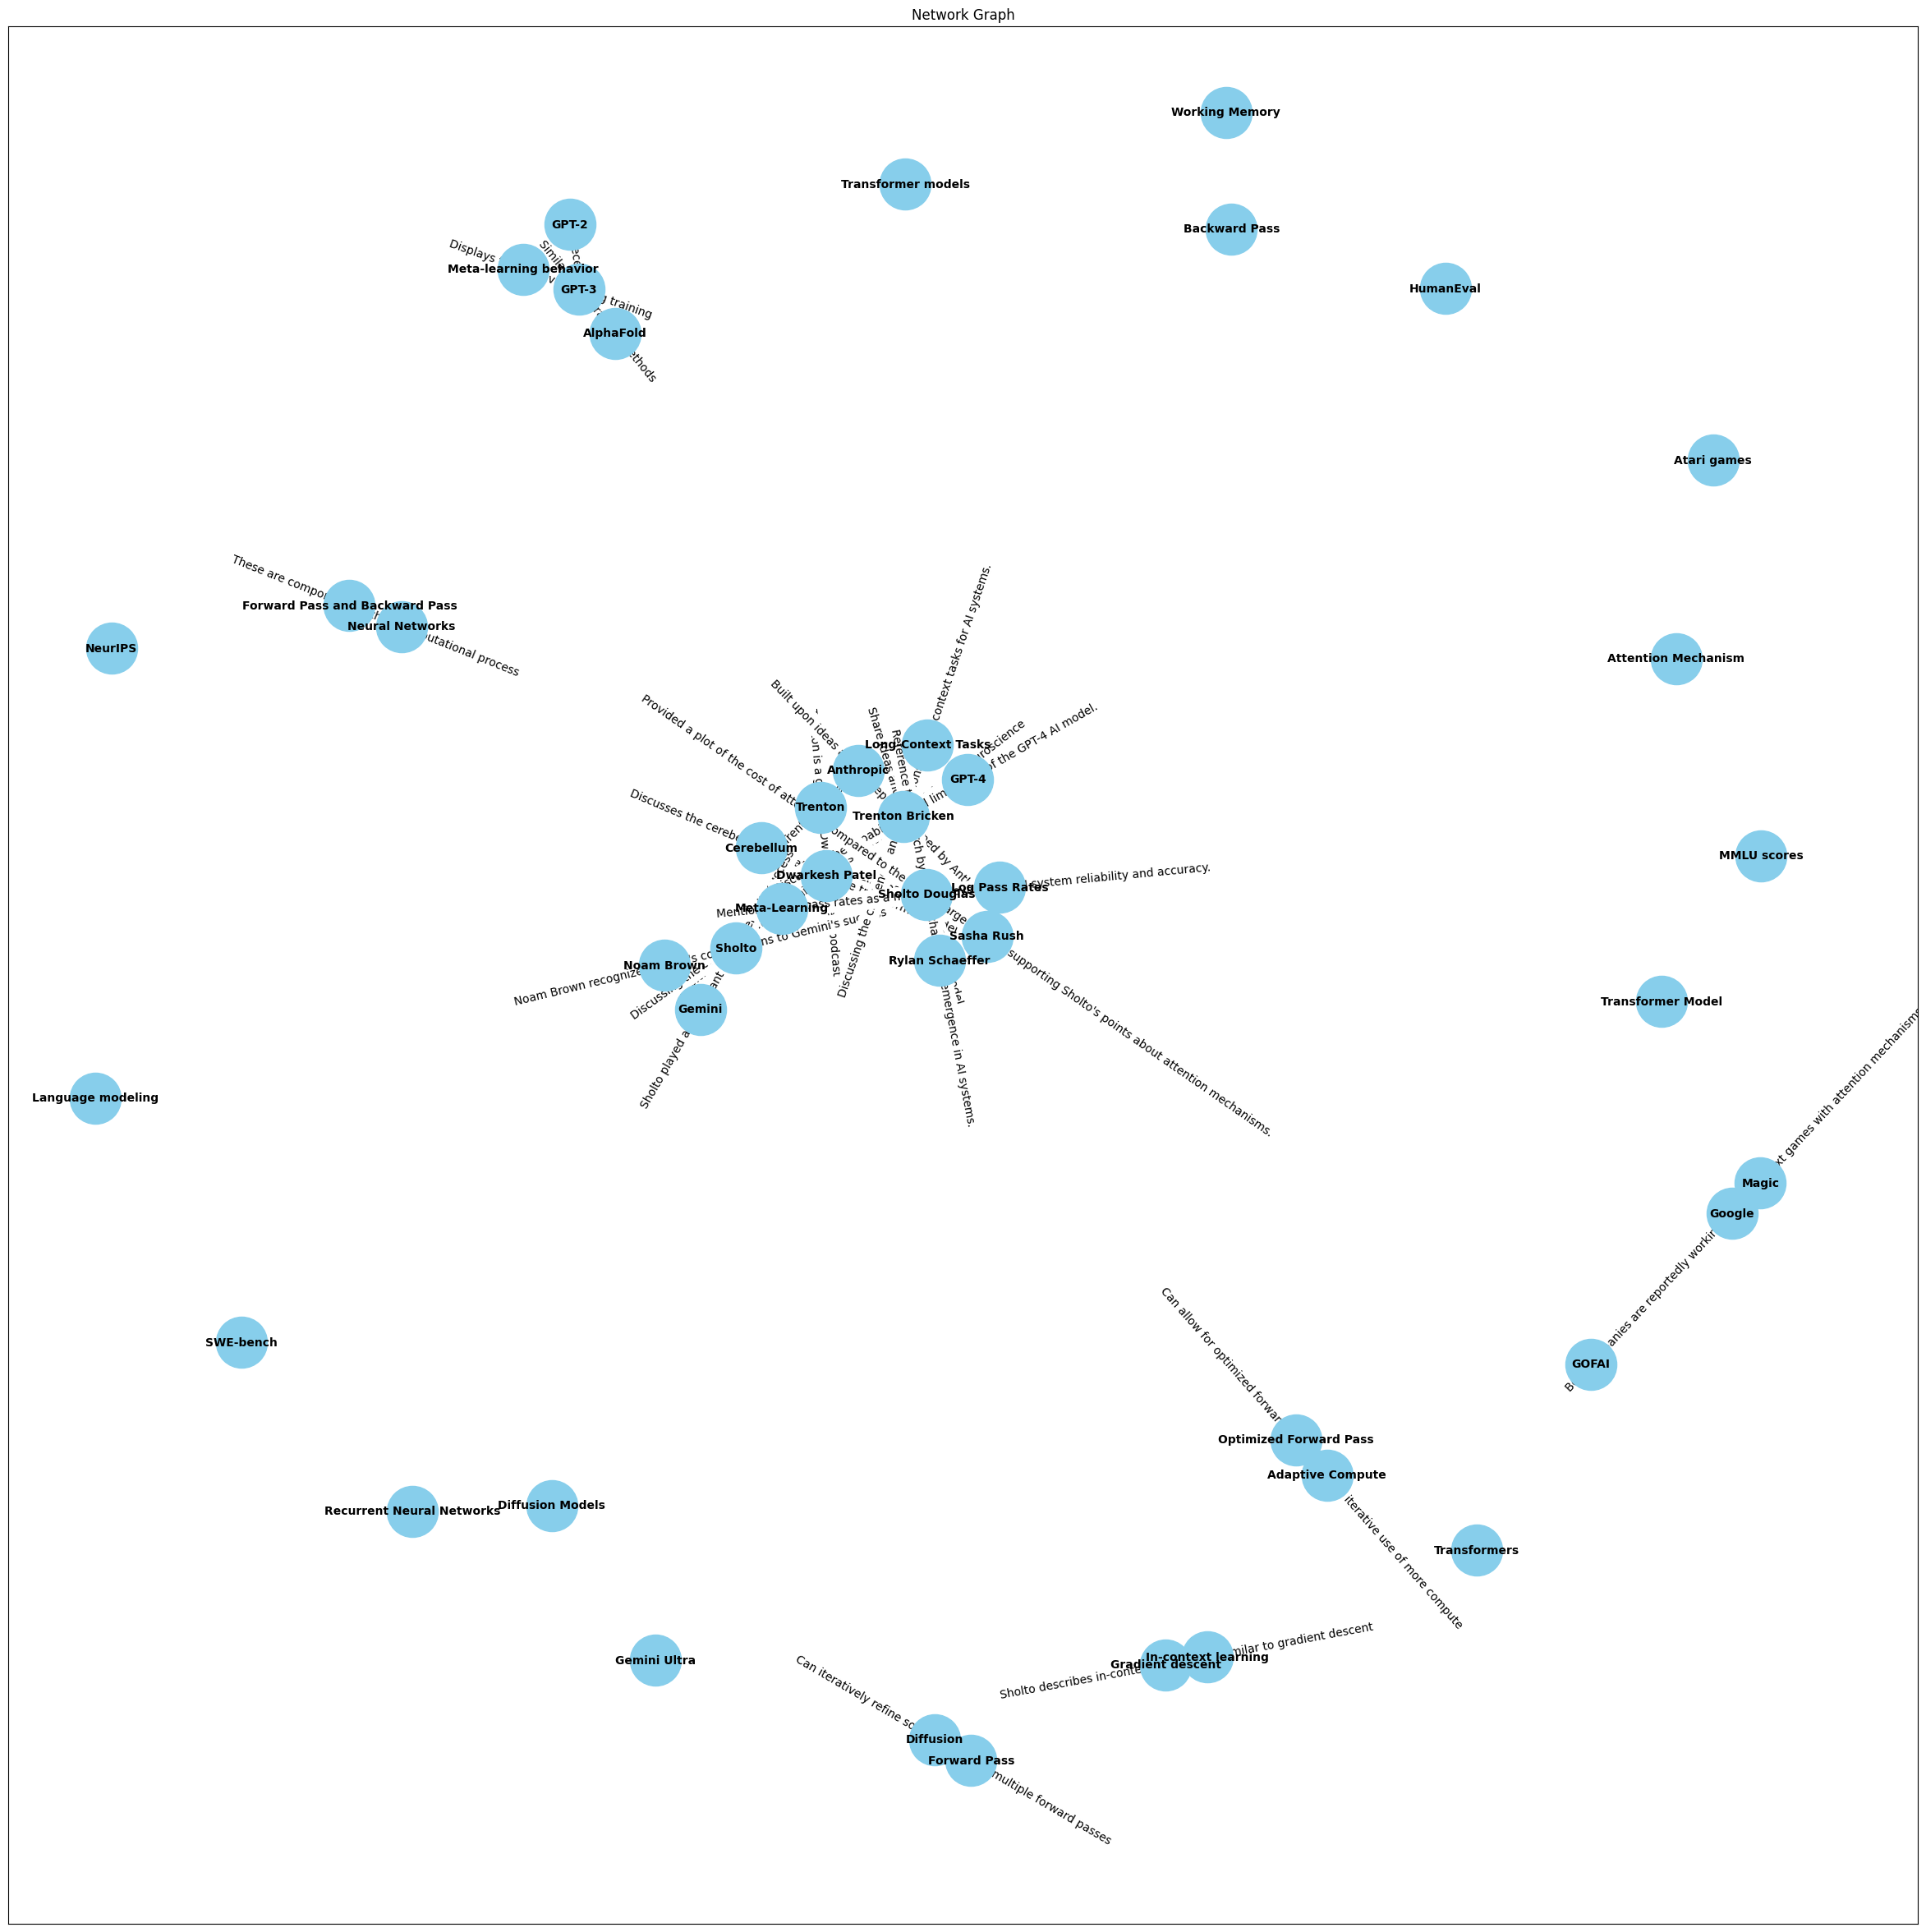

In [45]:
def plot_graph(G):
    # Visualize the graph using matplotlib
    plt.figure(figsize=(30, 30))

    # Draw the nodes
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="skyblue")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Draw the labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    # Draw the edge labels
    edge_labels = nx.get_edge_attributes(G, 'relationship')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Show the plot
    plt.title("Network Graph")
    plt.show()

plot_graph(G)

In [30]:
from cdlib import algorithms

In [31]:
def detect_communities(graph):
    communities = []
    index = 0
    for component in nx.connected_components(graph):
        print(
            f"Component index {index} of {len(list(nx.connected_components(graph)))}:")
        subgraph = graph.subgraph(component)
        if len(subgraph.nodes) > 1:  # Leiden algorithm requires at least 2 nodes
            try:
                sub_communities = algorithms.leiden(subgraph)
                for community in sub_communities.communities:
                    communities.append(list(community))
            except Exception as e:
                print(f"Error processing community {index}: {e}")
        else:
            communities.append(list(subgraph.nodes))
        index += 1
    print("Communities from detect_communities:", communities)
    return communities

community = detect_communities(G)

Component index 0 of 23:
Component index 1 of 23:
Component index 2 of 23:
Component index 3 of 23:
Error processing community 3: invalid literal for int() with base 10: 'Gradient descent'
Component index 4 of 23:
Component index 5 of 23:
Component index 6 of 23:
Component index 7 of 23:
Error processing community 7: invalid literal for int() with base 10: 'Google'
Component index 8 of 23:
Component index 9 of 23:
Component index 10 of 23:
Component index 11 of 23:
Component index 12 of 23:
Error processing community 12: invalid literal for int() with base 10: 'Meta-learning behavior'
Component index 13 of 23:
Error processing community 13: invalid literal for int() with base 10: 'Diffusion'
Component index 14 of 23:
Component index 15 of 23:
Error processing community 15: invalid literal for int() with base 10: 'Optimized Forward Pass'
Component index 16 of 23:
Component index 17 of 23:
Component index 18 of 23:
Error processing community 18: invalid literal for int() with base 10: 'N

In [43]:
sc = community[0]

subG = G.subgraph(sc)

In [44]:
subG

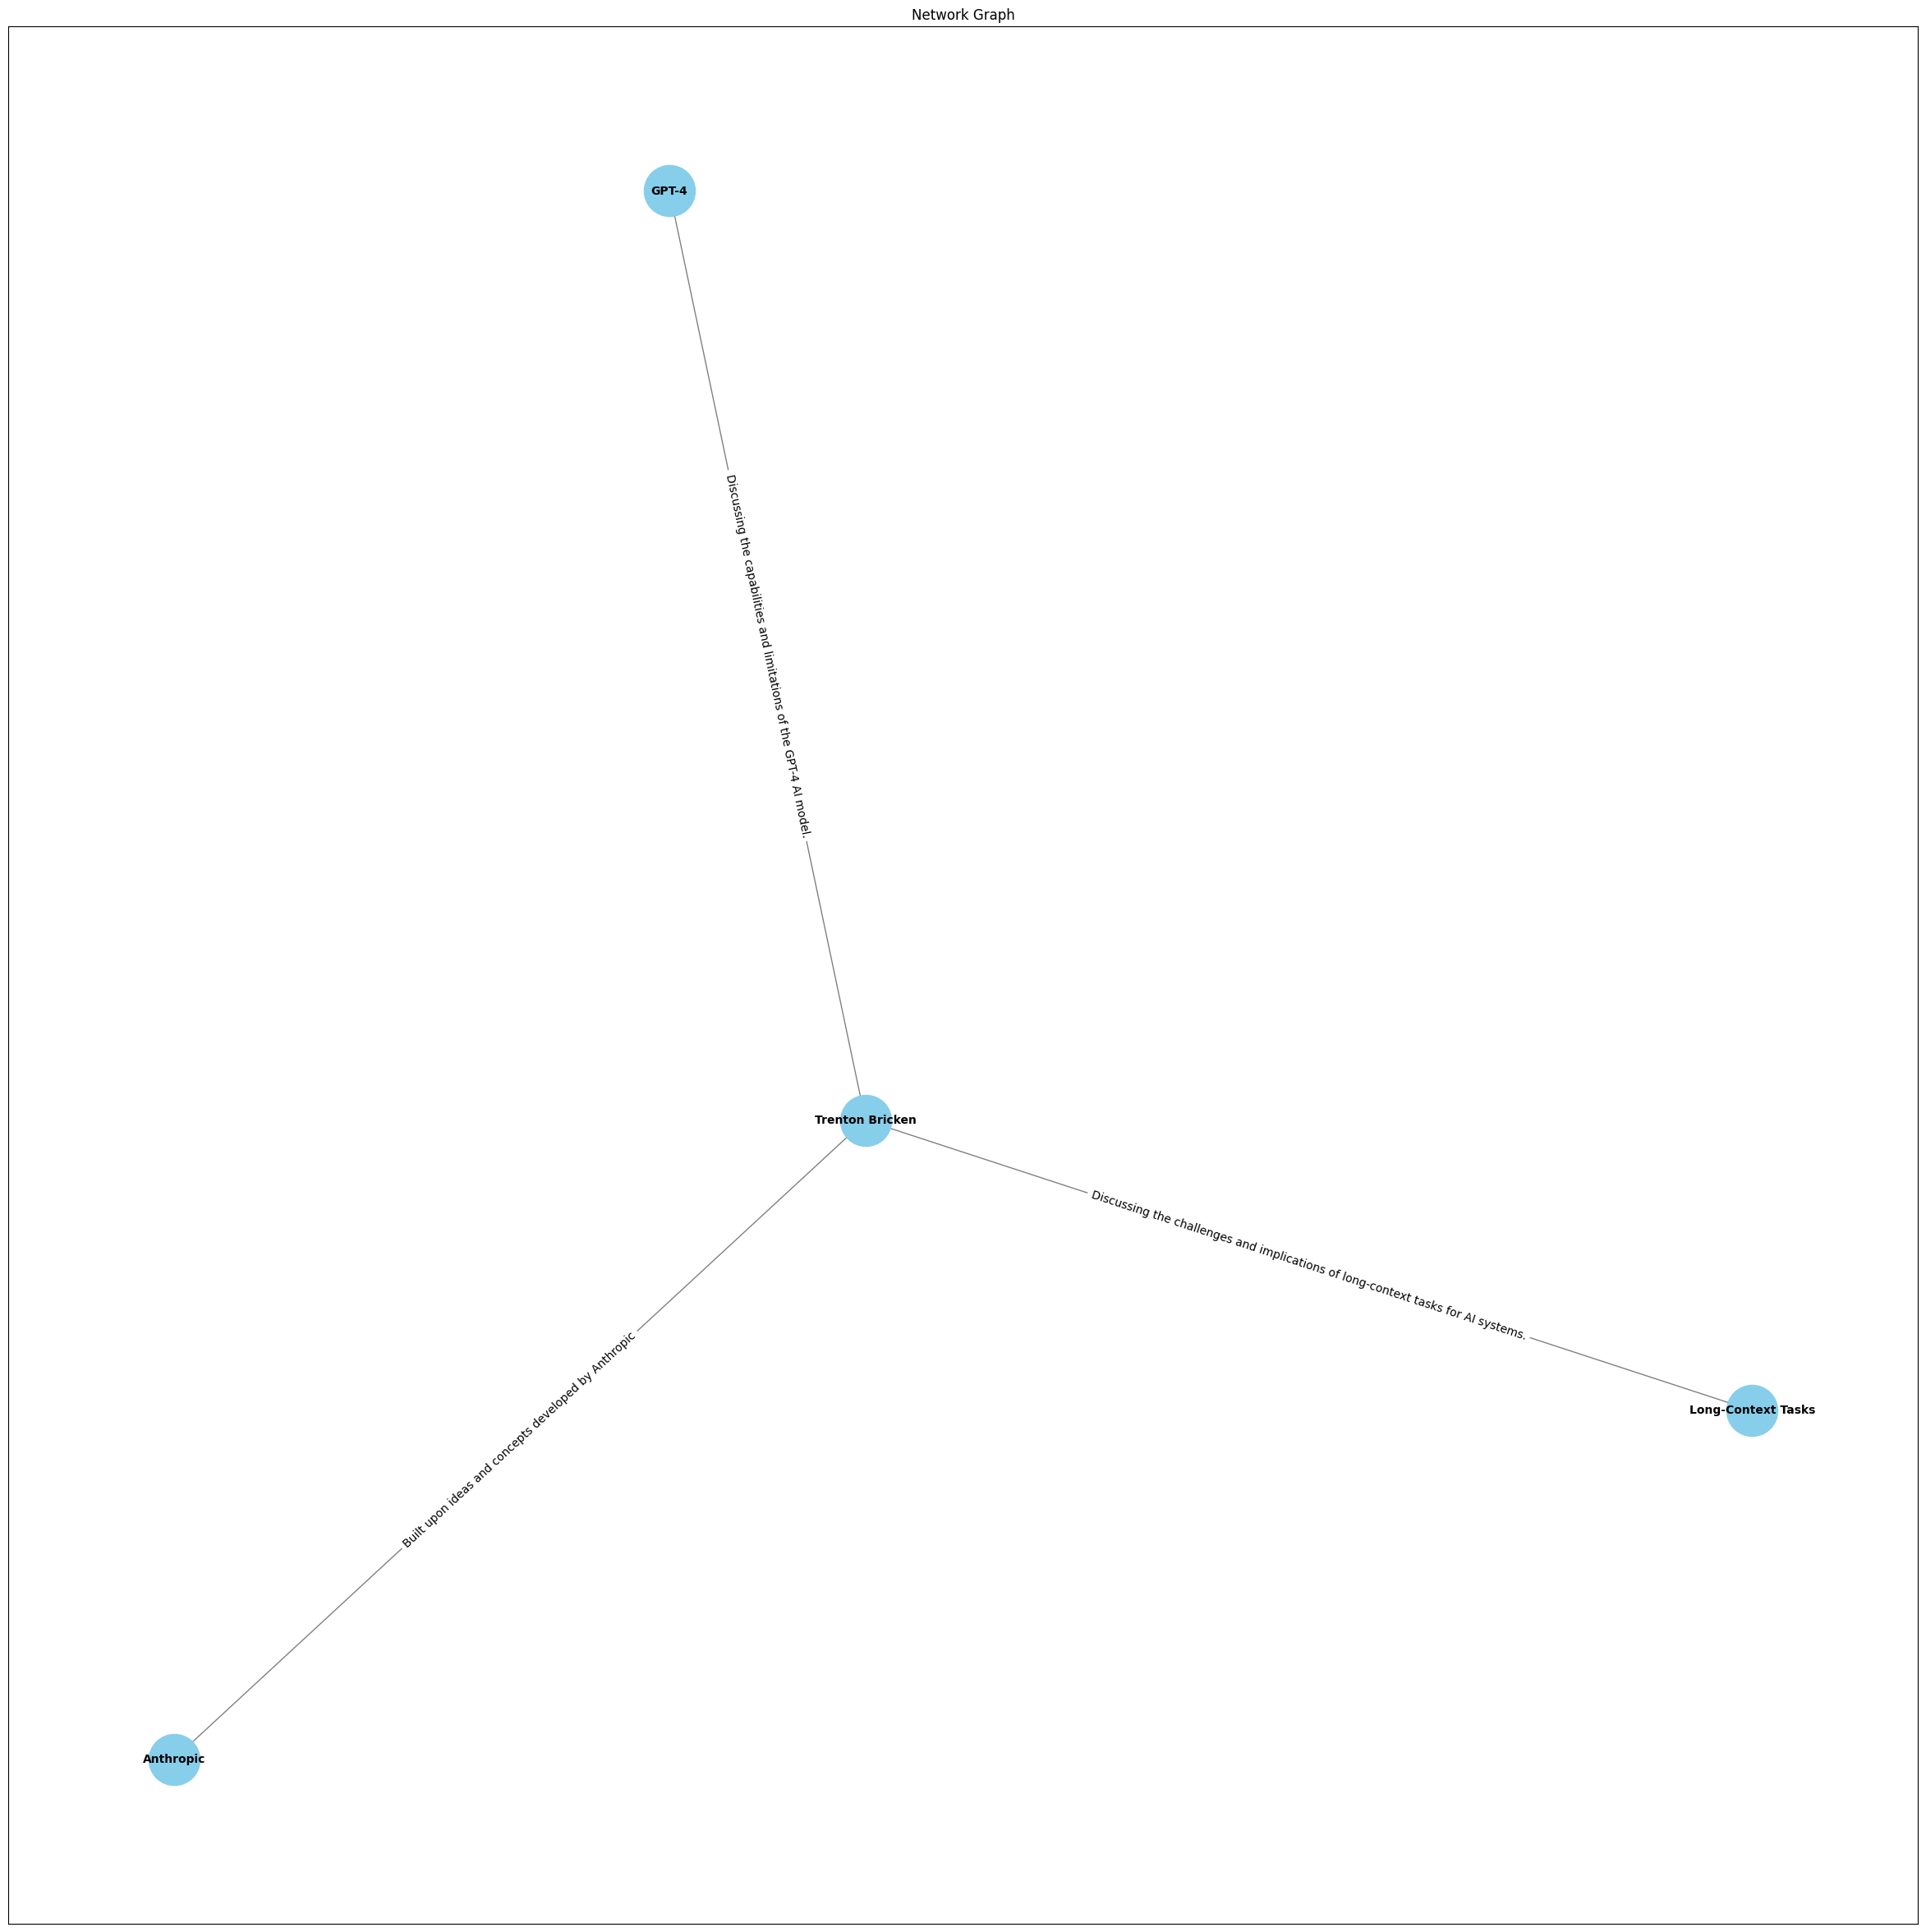

In [46]:
plot_graph(subG)

In [52]:
G.edge_subgraph()

TypeError: Graph.edge_subgraph() missing 1 required positional argument: 'edges'